# Magma Simulator

In [1]:
import magma as m
m.set_mantle_target('ice40')

import mantle

import lattice ice40
import lattice mantle40


## Simulating Combinational Circuits

Create a 2-input multiplexor.

In [2]:
Mux2 = mantle.Mux2
print(Mux2)

Mux2(I: In(Bits(2)), S: In(Bit), O: Out(Bit))


In [3]:
from magma.simulator import PythonSimulator

simulator = PythonSimulator(Mux2)

print('I0 I1 S O')
for i0 in [0,1]:
    for i1 in [0,1]:
        for s in [0,1]:
            simulator.set_value(Mux2.I, m.bits([i0, i1]))
            simulator.set_value(Mux2.S, s)
            simulator.evaluate()
            print(i0, i1, s, int(simulator.get_value(Mux2.O)))

I0 I1 S O
0 0 0 0
0 0 1 0
0 1 0 0
0 1 1 1
1 0 0 1
1 0 1 0
1 1 0 1
1 1 1 1


## Simulating Sequential Logic Circuits with Clocks

Create a 2-bit Counter.

In [4]:
Counter = mantle.DefineCounter(2)

print(Counter)

Counter2(O: Out(UInt(2)), COUT: Out(Bit), CLK: In(Clock))


Create a python simulator for the ice40.

In [5]:
from magma.simulator import PythonSimulator

simulator = PythonSimulator(Counter, clock=Counter.CLK)
O0 = []
O1 = []
COUT = []
for i in range(16):
    for j in range(2):
        simulator.advance()
        O = simulator.get_value(Counter.O)
        O0.append(O[0])
        O1.append(O[1])
        COUT.append(simulator.get_value(Counter.COUT))

Use `matplotlib` to plot the output of the simulator.

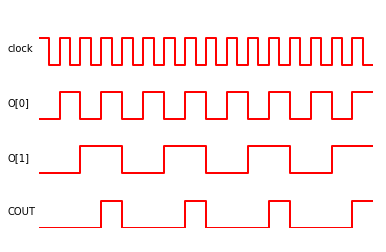

In [6]:
import matplotlib.pyplot as plt
import numpy as np

n = len(O1)//2
t = np.repeat(0.5*np.arange(2*n+1),2)[1:-1]
clock = np.tile(np.array([1,1,0,0]),n)

O0 = np.repeat(np.array(O0),2)
O1 = np.repeat(np.array(O1),2)
COUT = np.repeat(np.array(COUT),2)


plt.text(-1.5, 3.25, 'clock')
plt.plot(t, 0.5*clock+3, 'r', linewidth = 2)
plt.text(-1.5, 2.25, 'O[0]')
plt.plot(t, 0.5*O0+2,    'r', linewidth = 2)
plt.text(-1.5, 1.25, 'O[1]')
plt.plot(t, 0.5*O1+1,    'r', linewidth = 2)
plt.text(-1.5, 0.25, 'COUT')
plt.plot(t, 0.5*COUT,    'r', linewidth = 2)
plt.xlim([0,n])
plt.ylim([0,4])

plt.gca().axis('off')
plt.show()